<a href="https://colab.research.google.com/github/JuanRoccia/Advanced-Python-Programming/blob/main/PPA_Proyecto_Final_Juan_Manuel_Roccia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - Programación Python Avanzada**

---

En este documento se presentan 2 problemas a resolver y se pide resolverlos de acuerdo a
las especificaciones dadas.

Es importante hacer un análisis de los resultados obtenidos
como se especifica en los enunciados.

Cuando haya finalizado, cargue el notebook (archivo
ipynb) con el código y las conclusiones correspondientes.

**Nota:** *En el caso de los métodos de aprendizaje supervisado, separe el conjunto train-test.*

# **Ejercicio 1** - "El Estacionamiento" by Quentin Learningtino

1. Un supermercado quiere diseñar un sistema para indicarle a sus clientes qué tan lleno
está el estacionamiento en su página web.<br> El programador al que contrató le pidió que
colocara una cámara que tomara fotos del estacionamiento regularmente, y al cabo de un
tiempo se creó un dataset, con 300 imágenes del estacionamiento lleno, y otras 300 del
estacionamiento vacío, con distintas condiciones de clima y hora del día.<br>
El conjunto de imágenes está disponible aquí: <a href="https://drive.google.com/drive/folders/1newcLiCoF50Hpfqh-RpJi7ba5MWTeGr1">dataset</a>


In [ ]:
# 300 imágenes estacionamiento lleno
# 300 imágenes estacionamiento vacio

a) Procese la información del dataset a una reconocible por Scikit Learn, y sepáralas
adecuadamente en sets de entrenamiento y de testeo. Considere que usar excesiva
cantidad de información puede ser contraproducente para el modelo, ¿cómo puede
optimizar el tiempo empleado en procesar los datos, sin empeorar o incluso
mejorando el desempeño del clasificador?

Para procesar la información del dataset y separarla en conjuntos de entrenamiento y testeo, se pueden seguir los siguientes pasos:



1.   Cargar las imágenes del dataset en memoria utilizando la librería PIL (Python Imaging Library) o cualquier otra librería que permita cargar imágenes en formato JPEG o PNG.
2.   Convertir cada imagen a un array numpy de dos dimensiones, donde cada elemento del array represente un pixel de la imagen y tenga un valor entre 0 y 255 que indique el nivel de intensidad del mismo.
3.   Crear dos listas: una para las imágenes y otra para las etiquetas (que indican si la imagen corresponde a un estacionamiento lleno o vacío). Cada elemento de cada lista debe corresponder a una imagen y a su respectiva etiqueta.
4.   Utilizar la función "train_test_split" de Scikit Learn para separar las imágenes y las etiquetas en dos conjuntos: uno de entrenamiento y otro de testeo. La función "train_test_split" toma como argumentos las listas de imágenes y etiquetas y devuelve cuatro listas: dos para el conjunto de entrenamiento (una para las imágenes y otra para las etiquetas) y dos para el conjunto de testeo (una para las imágenes y otra para las etiquetas).

Para optimizar el tiempo empleado en procesar los datos, es posible utilizar técnicas de preprocesamiento para reducir el tamaño de las imágenes o para eliminar información redundante o irrelevante.<br> También se pueden utilizar técnicas de reducción de dimensionalidad para reducir el número de características de las imágenes, lo que puede mejorar el tiempo de entrenamiento del modelo sin empeorar significativamente su desempeño.<br> Es importante tener en cuenta que cada técnica tiene sus propias ventajas y desventajas y que es necesario evaluar cuál es la mejor opción en cada caso particular.

1. Subir el dataset a Google Drive y montar la unidad de Google Drive en Colab.<br> Esto se puede hacer ejecutando las siguientes celdas:

In [ ]:
# Para leer datos de Google Drive
from google.colab import drive
drive.mount('/content/Drive/')

Mounted at /content/Drive/


2. Cargar las imágenes del dataset en memoria utilizando la librería PIL (Python Imaging Library) o cualquier otra librería que permita cargar imágenes en formato JPEG o PNG.<br> Para cargar una imagen, se puede utilizar la función "Image.open" de PIL, por ejemplo:

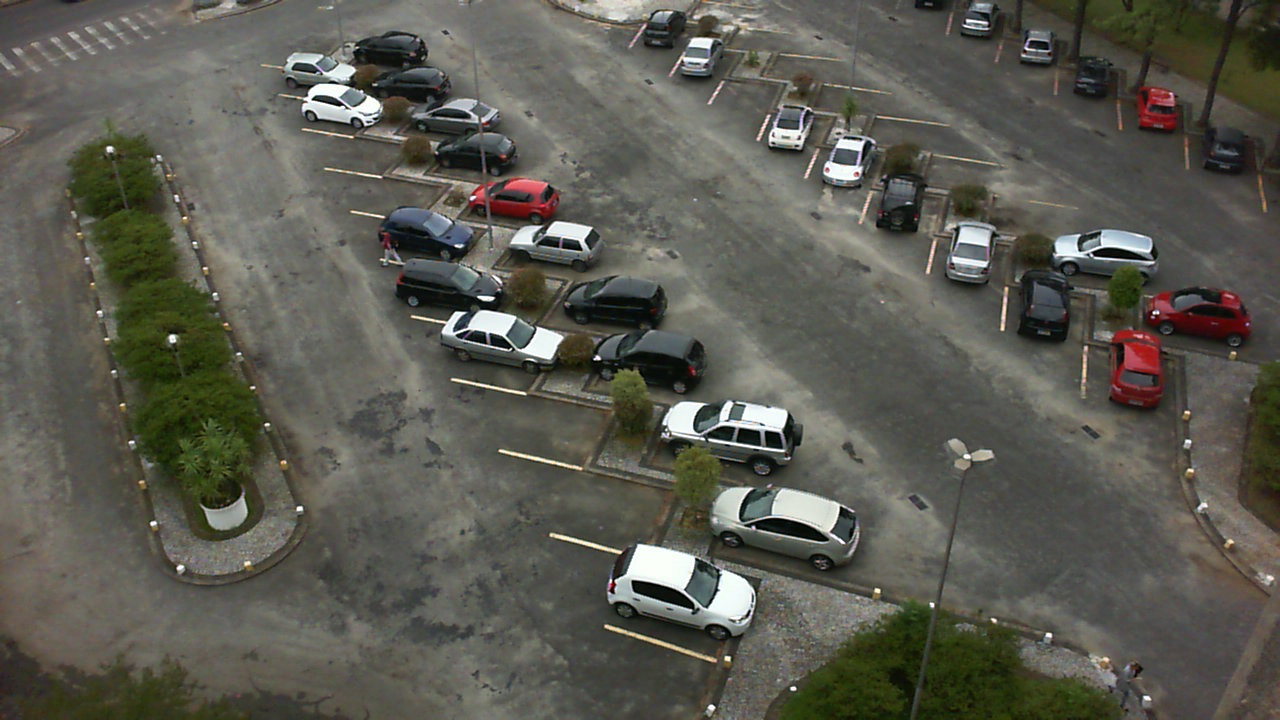

In [ ]:
from PIL import Image

# Cargar imagen desde la unidad de Google Drive
image = Image.open('/content/Drive/MyDrive/Final/MuchosAutos/2013-02-22_07_25_01.jpg')

# Mostrar imagen
display(image)

3. Convertir cada imagen a un array numpy de dos dimensiones, donde cada elemento del array represente un pixel de la imagen y tenga un valor entre 0 y 255 que indique el nivel de intensidad del mismo.<br> Para convertir una imagen a un array numpy, se puede utilizar la función "np.array" de numpy, por ejemplo:

In [ ]:
import numpy as np

# Convertir imagen a array numpy
image_array = np.array(image)

# Mostrar array numpy
print(image_array)


4. Crear dos listas: una para las imágenes y otra para las etiquetas (que indican si la imagen corresponde a un estacionamiento lleno o vacío).<br> Cada elemento de cada lista debe corresponder a una imagen y a su respectiva etiqueta.<br> Para cargar todas las imágenes del dataset en las listas, se puede utilizar un bucle y la función "os.listdir" de la librería os para obtener la lista de archivos del dataset, por ejemplo:

In [ ]:
import os

# Directorio del dataset
dataset_dir = '/content/drive/My Drive/dataset'

# Listas para almacenar las imágenes y las etiquetas
images = []
labels = []

# Recorrer todos los archivos del dataset
for file in os.listdir(dataset_dir):
  # Si el archivo es una imagen
  if file.endswith('.jpg') or file.endswith('.png'):
    # Cargar imagen
    image = Image.open(os.path.join(dataset_dir, file))
    # Convertir imagen a array numpy
    image_array = np.array(image)
    # Añadir imagen y etiqueta a las listas
    images.append(image_array)
    if 'full' in file:
      labels.append(1)
    else:
      labels.append(0)

5. Añadir la imagen y su etiqueta a las listas "images" y "labels", respectivamente. Para determinar la etiqueta de la imagen, se puede utilizar el nombre del archivo, por ejemplo, si el nombre del archivo incluye la palabra "full", se puede asignar la etiqueta 1 a la imagen (indicando que el estacionamiento está lleno) y si el nombre del archivo incluye la palabra "empty", se puede asignar la etiqueta 0 (indicando que el estacionamiento está vacío):


In [ ]:
# Añadir imagen y etiqueta a las listas
images.append(image_array)
if 'full' in file:
  labels.append(1)
else:
  labels.append(0)


6. Una vez que se han cargado todas las imágenes del dataset en las listas "images" y "labels", se puede utilizar la función "train_test_split" de Scikit Learn para separar las imágenes y las etiquetas en dos conjuntos: uno de entrenamiento y otro de testeo. La función "train_test_split" toma como argumentos las listas de imágenes y etiquetas y devuelve cuatro listas: dos para el conjunto de entrenamiento (una para las imágenes y otra para las etiquetas) y dos para el conjunto de testeo (una para las imágenes y otra para las etiquetas). Por ejemplo:


In [ ]:
from sklearn.model_selection import train_test_split

# Separar imágenes y etiquetas en conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)


En este ejemplo se está utilizando un tamaño del conjunto de testeo del 20%, lo que significa que el 80% de las imágenes se utilizarán para el conjunto de entrenamiento. Es importante tener en cuenta que el tamaño de cada conjunto debe ser adecuado para que el modelo pueda aprender de manera efectiva, pero también es importante tener suficiente información en el conjunto de testeo para poder evaluar adecuadamente el desempeño del modelo.

Para optimizar el tiempo empleado en procesar los datos, es posible utilizar técnicas de preprocesamiento para reducir el tamaño de las imágen